<a href="https://colab.research.google.com/github/rkrish97/BWCNN/blob/master/Image%20dehazing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install tensorflow==1.15

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-j4lapd8t
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-j4lapd8t
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=d765a036cdd854879901e368952fa37afed8ad3e0e36f71025776a3af05bfcc1
  Stored in directory: /tmp/pip-ephem-wheel-cache-t5l0dlgv/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib
     |████████████████████████████████| 412.3MB 38kB/s 
     |████████████████████████████████| 3.8MB 28.2MB/s 
     |████████████████████████████████| 512kB 44.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=864a64a195306a8fe05974e1736a4386860155360ec203c5f45dd94239070721
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probabil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1-umtXiV8Bd0n5eVr2L3pGVmc61MJe2tF'})
download.GetContentFile('testing_tar.tgz')

In [ ]:
!tar -xvf  'testing_tar.tgz' -C 'sample_data'

._TESTING_TAR
TESTING_TAR/
TESTING_TAR/._.DS_Store
TESTING_TAR/.DS_Store
TESTING_TAR/._MY_TEST_FOLDER
TESTING_TAR/MY_TEST_FOLDER/
TESTING_TAR/._MY_WEIGHTS_USING_EEC206_DATASET
TESTING_TAR/MY_WEIGHTS_USING_EEC206_DATASET/
TESTING_TAR/MY_WEIGHTS_USING_EEC206_DATASET/._.DS_Store
TESTING_TAR/MY_WEIGHTS_USING_EEC206_DATASET/.DS_Store
TESTING_TAR/MY_WEIGHTS_USING_EEC206_DATASET/._model_checkpoint_9.ckpt.index
TESTING_TAR/MY_WEIGHTS_USING_EEC206_DATASET/model_checkpoint_9.ckpt.index
TESTING_TAR/MY_WEIGHTS_USING_EEC206_DATASET/._model_checkpoint_9.ckpt.meta
TESTING_TAR/MY_WEIGHTS_USING_EEC206_DATASET/model_checkpoint_9.ckpt.meta
TESTING_TAR/MY_WEIGHTS_USING_EEC206_DATASET/._model_checkpoint_9.ckpt.data-00000-of-00001
TESTING_TAR/MY_WEIGHTS_USING_EEC206_DATASET/model_checkpoint_9.ckpt.data-00000-of-00001
TESTING_TAR/MY_TEST_FOLDER/._3068_0.8_0.1.jpg
TESTING_TAR/MY_TEST_FOLDER/3068_0.8_0.1.jpg
TESTING_TAR/MY_TEST_FOLDER/._3081_0.8_0.2.jpg
TESTING_TAR/MY_TEST_FOLDER/3081_0.8_0.2.jpg
TESTING_TAR/M

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Lambda, Input
from keras import backend as K
import cv2, numpy as np
import glob
from keras.activations import relu 
import keras as keras
from keras.models import Model
import tensorflow as tf


from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
img_width, img_height = 640, 480
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from  sklearn.model_selection import train_test_split

#from tensorflow.python import debug as tf_debug
import imageio
import glob
from skimage import transform as tf

from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import scipy
import scipy
import skimage
import re
#import LRFinder
import math as m

from keras_contrib.losses import DSSIMObjective
from keras import backend as K
from pathlib import Path
from keras import optimizers

import numpy as np
from keras_contrib.losses import DSSIMObjective
from keras import backend as K
from skimage.measure import compare_ssim, compare_psnr

import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl


from matplotlib import image
import numpy as np
import numpy
from sklearn.model_selection import train_test_split
import tensorflow as tf
from PIL import Image
import glob
from keras.layers import ReLU
from google.colab.patches import cv2_imshow

Using TensorFlow backend.


In [ ]:
height = 480
width = 640
trainx_loc = []
trainy_loc = []
def load_image(X):
  X = tf.io.read_file(X)
  X = tf.image.decode_jpeg(X,channels=3)
  X = tf.image.resize(X,(480,640))
  X = X / 255.0
  return X


clear_list = []
clear_locations = []
for filename in glob.glob('/content/sample_data/MY_CURRENT_DATASET/CLEAR/*.jpg'):
    clear_locations.append(filename)
    clear_list.append(filename.split('/')[-1][0:4])
print("clear")
clear_list = np.array(clear_list)
clear_locations = np.array(clear_locations)
for filename in glob.glob('/content/sample_data/MY_CURRENT_DATASET/HAZY/*.jpg'):
    clear_img_loc = clear_locations[np.where(clear_list == filename.split('/')[-1][0:4])[0][0]]
    trainx_loc.append(filename)
    trainy_loc.append(clear_img_loc)
    
print("#1")

testx_loc = trainx_loc[-1820:]
testy_loc = trainy_loc[-1820:]
trainx_loc = trainx_loc[0:16380]
trainy_loc = trainy_loc[0:16380]
print(len(trainx_loc))
print(len(testx_loc))
batch_size = 8
train_data = []
val_data = []
for i in range(len(trainx_loc)):
  train_data.append([trainx_loc[i], trainy_loc[i]])

for i in range(len(testx_loc)):
  val_data.append([testx_loc[i], testy_loc[i]])

train_ds_hazy = tf.data.Dataset.from_tensor_slices([data[0] for data in train_data]).map(lambda x: load_image(x))
train_ds_orig = tf.data.Dataset.from_tensor_slices([data[1] for data in train_data]).map(lambda x: load_image(x))
train_ds = tf.data.Dataset.zip((train_ds_hazy,train_ds_orig)).shuffle(100).repeat().batch(batch_size)

val_ds_hazy = tf.data.Dataset.from_tensor_slices([data[0] for data in val_data]).map(lambda x: load_image(x))
val_ds_orig = tf.data.Dataset.from_tensor_slices([data[1] for data in val_data]).map(lambda x: load_image(x))
val_ds = tf.data.Dataset.zip((val_ds_hazy,val_ds_orig)).shuffle(100).repeat().batch(batch_size)

iterator = tf.data.Iterator.from_structure(train_ds.output_types,train_ds.output_shapes)

train_init_op = iterator.make_initializer(train_ds)
val_init_op = iterator.make_initializer(val_ds)

next_element = iterator.get_next()

def haze_net(X):
  weight_decay = 1e-4
  conv1 = Conv2D(3,(1,1),padding="SAME",activation="relu",use_bias=True,kernel_initializer=tf.initializers.random_normal(),
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(X)
  conv2 = Conv2D(3,(3,1),padding="SAME",activation="relu",use_bias=True,kernel_initializer=tf.initializers.random_normal(),
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(conv1)
  concat1 = tf.concat([conv1,conv2],axis=-1)
  
  conv3 = Conv2D(3,(5,1),padding="SAME",activation="relu",use_bias=True,kernel_initializer=tf.initializers.random_normal(),
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(concat1)
  concat2 = tf.concat([conv2,conv3],axis=-1)
  
  conv4 = Conv2D(3,(7,1),padding="SAME",activation="relu",use_bias=True,kernel_initializer=tf.initializers.random_normal(),
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(concat2)
  concat3 = tf.concat([conv1,conv2,conv3,conv4],axis=-1)
  
  conv5 = Conv2D(3,(3,1),padding="SAME",activation="relu",use_bias=True,kernel_initializer=tf.initializers.random_normal(),
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(concat3)
  K = conv5
  
  output = ReLU(max_value=1.0)(tf.math.multiply(K,X) - K + 1.0)
  #output = output / 255.0
  
  return output

X = tf.placeholder(shape=(None,480,640,3),dtype=tf.float32)
Y = tf.placeholder(shape=(None,480,640,3),dtype=tf.float32)
dehazed_X = haze_net(X)

loss = tf.reduce_mean(tf.square(dehazed_X-Y))

# Step (a)
learning_rate = 2e-4
optimizer = tf.train.AdamOptimizer(learning_rate)# Step (b)
trainable_variables = tf.trainable_variables()
gradients_and_vars = optimizer.compute_gradients(loss,trainable_variables)# Step (c)
#clipped_gradients = [(tf.clip_by_norm(gradient,0.1),var) for gradient,var in gradients_and_vars]# Step (d)
optimizer = optimizer.apply_gradients(gradients_and_vars)

def showImage(x):
  x = np.asarray(x*255,dtype=np.int32)
  cv2_imshow(x)

saver = tf.train.Saver()
n_epochs = 10
with tf.Session() as sess:

  sess.run(tf.global_variables_initializer())
  for epoch in range(n_epochs):
    
    sess.run(train_init_op)
    batches = len(train_data) // batch_size
    epoch_loss = 0.0
    for batch in range(batches):

      batch_data = sess.run(next_element)
      #print(batch_data[0].shape,batch_data[1].shape)
      #print(np.max(batch_data[0]),np.max(batch_data[1]))
      batch_loss, _ = sess.run([loss,optimizer],feed_dict={X:batch_data[0],
                                                          Y:batch_data[1]})
      epoch_loss += batch_loss / float(batches)
      if batch % 1000 == 0:
        print("Training loss at batch %d: %f\n"%(batch,batch_loss))
          
    train_loss = epoch_loss

    sess.run(val_init_op)
    batches= len(val_data) // batch_size
    epoch_loss = 0.0
    for batch in range(batches):
      batch_data = sess.run(next_element)
      batch_loss = sess.run(loss,feed_dict={X:batch_data[0],
                                            Y:batch_data[1]})
      epoch_loss += batch_loss / float(batches)
      if batch % 500 == 0:
        print("Validation loss at batch %d: %f\n"%(batch,batch_loss))
        for j in range(-2 + batch_size//2):
          x = batch_data[0][j].reshape((1,)+batch_data[0][j].shape)
          y = batch_data[1][j].reshape((1,)+batch_data[1][j].shape)
          dehazed_x = sess.run(dehazed_X,feed_dict={X:x,Y:y})
          print("Image Number: %d\n"%(j))
          showImage(x[0])
          showImage(y[0])
          showImage(dehazed_x[0])
    val_loss = epoch_loss

    saver.save(sess,'./models/model_checkpoint_' + str(epoch) + '.ckpt')


In [ ]:
tf.reset_default_graph()
#train_data, val_data = setup_data_paths(orig_images_path="/content/sample_data/MY_CURRENT_DATASET/CLEAR/",
#                  hazy_images_path="/content/sample_data/MY_CURRENT_DATASET/HAZY/");

clear_list = []
clear_locations = []
#for filename in glob.glob('/content/drive/My Drive/haze dataset/hazy/train/clear/*.jpg'):
for filename in glob.glob('/content/sample_data/MY_CURRENT_DATASET/CLEAR/*.jpg'):
    clear_locations.append(filename)
    clear_list.append(filename.split('/')[-1][0:4])
print("clear")
clear_list = np.array(clear_list)
clear_locations = np.array(clear_locations)
for filename in glob.glob('/content/sample_data/MY_CURRENT_DATASET/HAZY/*.jpg'):
    clear_img_loc = clear_locations[np.where(clear_list == filename.split('/')[-1][0:4])[0][0]]
    trainx_loc.append(filename)
    trainy_loc.append(clear_img_loc)
    
print("#1")

testx_loc = trainx_loc[-1820:]
testy_loc = trainy_loc[-1820:]
trainx_loc = trainx_loc[0:16380]
trainy_loc = trainy_loc[0:16380]
print(len(trainx_loc))
print(len(testx_loc))
batch_size = 8
train_data = []
val_data = []

#this gives us train data and val data
for i in range(len(trainx_loc)):
  train_data.append([trainx_loc[i], trainy_loc[i]])

for i in range(len(testx_loc)):
  val_data.append([testx_loc[i], testy_loc[i]])

train_ds_hazy = tf.data.Dataset.from_tensor_slices([data[0] for data in train_data]).map(lambda x: load_image(x))
train_ds_orig = tf.data.Dataset.from_tensor_slices([data[1] for data in train_data]).map(lambda x: load_image(x))
train_ds = tf.data.Dataset.zip((train_ds_hazy,train_ds_orig)).shuffle(100).repeat().batch(batch_size)

val_ds_hazy = tf.data.Dataset.from_tensor_slices([data[0] for data in val_data]).map(lambda x: load_image(x))
val_ds_orig = tf.data.Dataset.from_tensor_slices([data[1] for data in val_data]).map(lambda x: load_image(x))
val_ds = tf.data.Dataset.zip((val_ds_hazy,val_ds_orig)).shuffle(100).repeat().batch(batch_size)

iterator = tf.data.Iterator.from_structure(train_ds.output_types,train_ds.output_shapes)

train_init_op = iterator.make_initializer(train_ds)
val_init_op = iterator.make_initializer(val_ds)

#train_init_op, val_init_op, iterator = create_datasets(train_data,val_data,batch_size)
next_element = iterator.get_next()

X = tf.placeholder(shape=(None,480,640,3),dtype=tf.float32)
Y = tf.placeholder(shape=(None,480,640,3),dtype=tf.float32)
dehazed_X = haze_net(X)

loss = tf.reduce_mean(tf.square(dehazed_X-Y))
optimizer = tf.train.AdamOptimizer(learning_rate)
trainable_variables = tf.trainable_variables()
gradients_and_vars = optimizer.compute_gradients(loss,trainable_variables)
clipped_gradients = [(tf.clip_by_norm(gradient,0.1),var) for gradient,var in gradients_and_vars]
optimizer = optimizer.apply_gradients(gradients_and_vars)

clear
#1
16380
1820


INFO:tensorflow:Restoring parameters from /content/sample_data/TESTING_TAR/MY_WEIGHTS_USING_EEC206_DATASET/model_checkpoint_9.ckpt


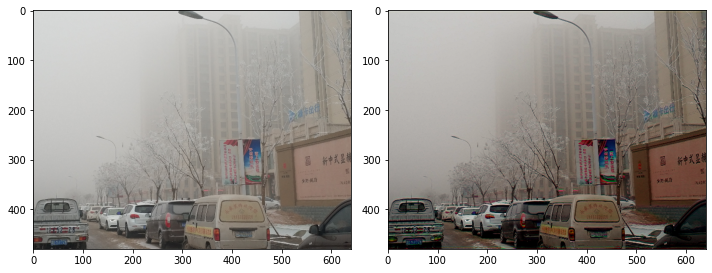

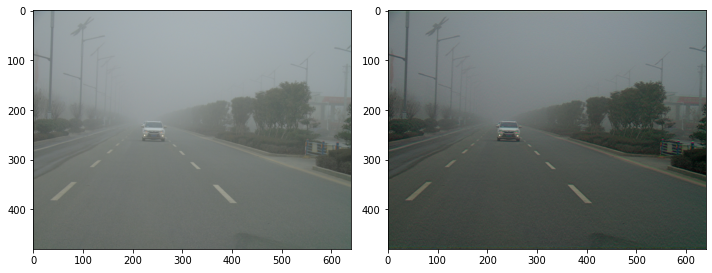

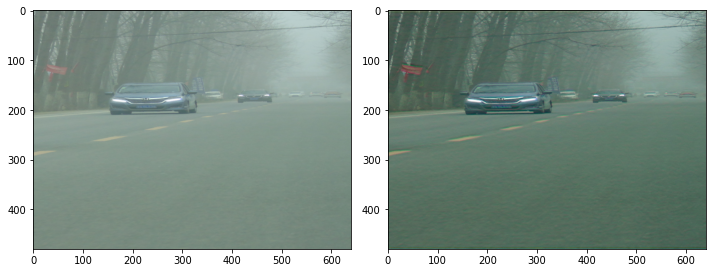

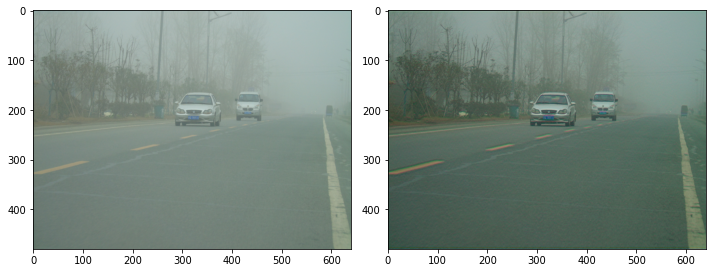

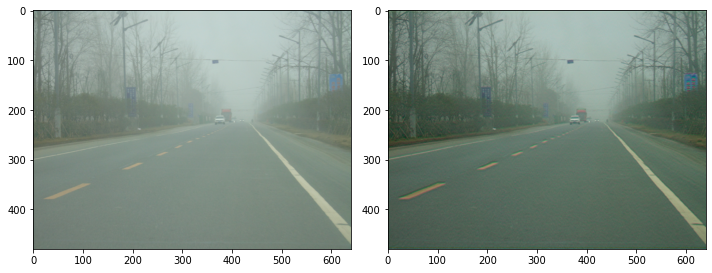

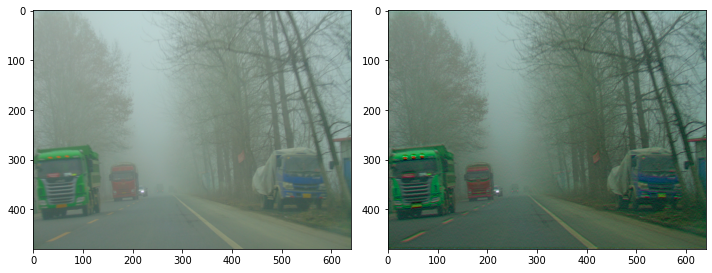

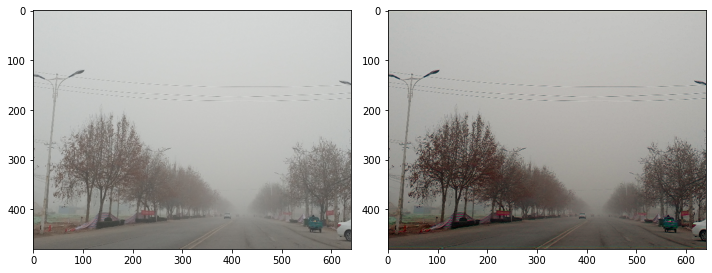

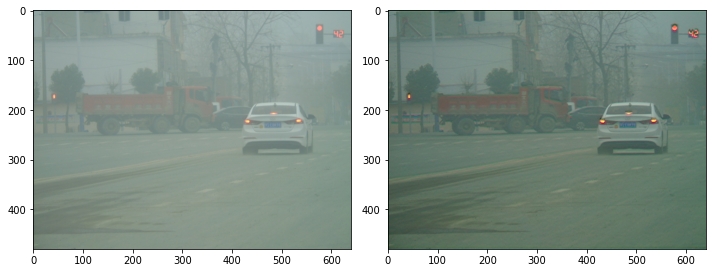

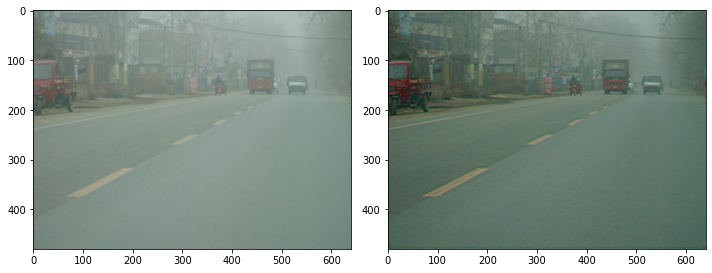

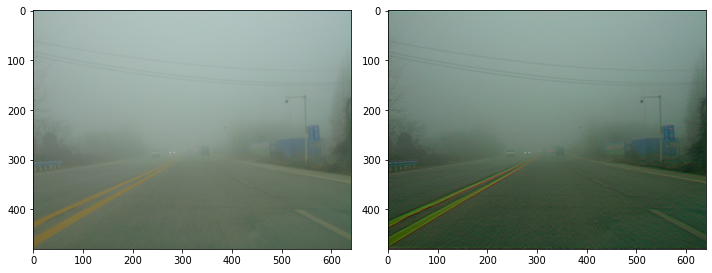

In [ ]:
saver = tf.train.Saver()


test_input_folder = "/content/sample_data/Rain-Haze/Haze"
test_output_folder = "/content/sample_data/dehazed_test_images2/"
if not os.path.exists(test_output_folder):
  os.mkdir(test_output_folder)
  
file_types = ['jpeg','jpg','png']

with tf.Session() as sess:
  #saver.restore(sess,'models/model_checkpoint_9.ckpt')
  saver.restore(sess,'/content/sample_data/TESTING_TAR/MY_WEIGHTS_USING_EEC206_DATASET/model_checkpoint_9.ckpt')
  test_image_paths = []
  for file_type in file_types:
    test_image_paths.extend(glob.glob(test_input_folder+"/*."+file_type))
  
  
  for path in test_image_paths:
    image_label = path.split(test_input_folder)[-1][1:]
    image = Image.open(path)
    image = image.resize((640, 480))
    image = np.asarray(image) / 255.0
    image = image.reshape((1,) + image.shape)
    dehazed_image = sess.run(dehazed_X,feed_dict={X:image,Y:image})
    
    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
    axes[0].imshow(image[0])
    axes[1].imshow(dehazed_image[0])
    fig.tight_layout()
    
    dehazed_image = np.asarray(dehazed_image[0] * 255,dtype=np.uint8)
    mpl.image.imsave(test_output_folder + "/" + 'dehazed_' + image_label, dehazed_image)